In [36]:
%load_ext autoreload 
%autoreload 2

import networkx
import pandas as pd
import glob
import nltk
from transformers import pipeline
from transformers import AutoModelForSequenceClassification, TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import expit
import os
import os, json, openai, warnings, random
import numpy as np
import pandas as pd
from IPython.display import Image, display
from sentence_transformers import SentenceTransformer, util
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
datasets = glob.glob("../../data/toots_mastodon*.parquet")
toots_df = pd.concat([pd.read_parquet(data) for data in datasets], axis=0)
# df = df[(df['content'].apply(len) < 256) & (df['language'] == 'en')]
# df = df[~df['content'].isna()].reset_index(drop=True)

toots_df.head(2).T


NameError: name 'toots' is not defined

In [26]:
import pyarrow
users_path = '../../data/directory_10k_users.parquet'
batch_size = 1000
user_parquet = pyarrow.parquet.ParquetFile(users_path)
pq_iter = user_parquet.iter_batches(batch_size=batch_size)
r = []
user_df_batches = []
for iter_ in pq_iter:
    batch_df = iter_.to_pandas()
    user_df_batches.append(batch_df)
user_df = pd.concat(user_df_batches, axis=0)

,0,1,2,3,4
id,110565524054304314,560206,108226287657799204,110295270137125176,110295289725378484
username,aclu,holgerjakobs,bashinho,borisjohnson,tldrnewsuk
acct,aclu@bird.seafoam.space,holgerjakobs@norden.social,bashinho@social.tchncs.de,borisjohnson@bird.chauvet.pro,tldrnewsuk@bird.chauvet.pro
display_name,ACLU,Holger Jakobs :verified: ⚣,Bashinho - Sohn der Bash,Boris Johnson,TLDR News UK
locked,False,False,False,False,False
bot,True,False,False,True,True
discoverable,True,True,True,True,True
group,False,False,False,False,False
created_at,2023-06-18T00:00:00.000Z,2018-10-08T00:00:00.000Z,2022-04-30T00:00:00.000Z,2023-05-01T00:00:00.000Z,2023-05-01T00:00:00.000Z
note,"The ACLU is a nonprofit, nonpartisan, legal an...",<p>PostgreSQL and Tcl/Tk specialist using Linu...,"<p>Youtuber für Linux, OSINT, BASH und Open S...",,


In [38]:
vc = toots_df['account'].apply(lambda acc: acc['acct']).value_counts()


<AxesSubplot:xlabel='account', ylabel='Count'>

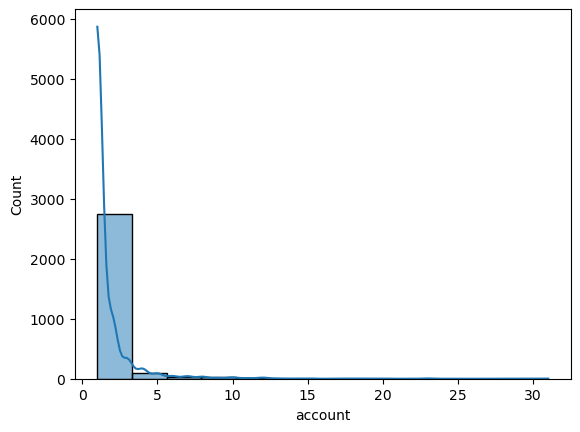

In [40]:
# user_df.sort_values(by=['follower_count'])
user_df.head(5).T

sns.histplot(vc, kde=True)